# USING RANDOM FORESTS

# Imports and Data

In [67]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from IPython.display import display
from sklearn.tree import export_graphviz
from scipy.stats import binom

from common.trinary_data import TrinaryData

In [16]:
TRINARY = TrinaryData(is_averaged=False, is_dropT1=False, is_regulator=True)  # Trinary data
DF_X = TRINARY.df_X
SER_Y = TRINARY.ser_y

In [56]:
SER_Y1 = SER_Y.apply(lambda v: 1 if v==1 else 0)
SER_Y1

T1.0     0
T1.1     0
T1.2     0
T2.0     1
T2.1     1
        ..
T24.1    0
T24.2    0
T25.0    0
T25.1    0
T25.2    0
Name: name, Length: 75, dtype: int64

Note some transformation is required if this is a binary classifier.

# Random Forest Usage

1. The RandomForest classifier creates decision trees that can be obtained from the property ``estimators_``.
1. The relative weighting of features can be found in ``feature_importances_``.

In [76]:
# Bootstrap == False: use all of the samples
clf = RandomForestClassifier(max_depth=4, random_state=0, bootstrap=False,
                            min_impurity_decrease=.01, min_samples_leaf=5)
_ = clf.fit(DF_X, SER_Y1)

# Visualization

In [75]:
binom.cdf(4, 5, 0.5)

0.96875

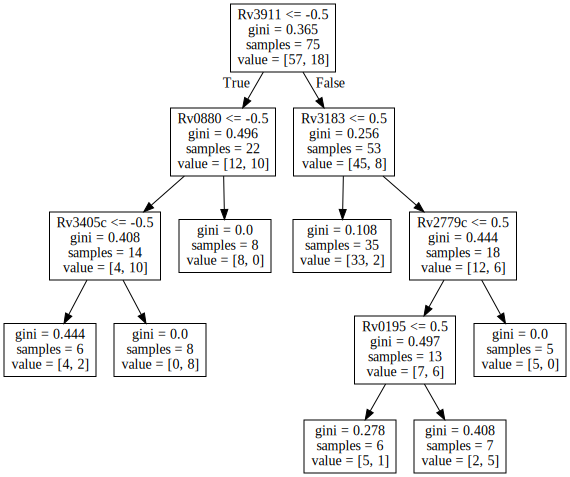

In [77]:
myTree = clf.estimators_[3]
display(graphviz.Source(export_graphviz(myTree, feature_names=DF_X.columns)))

In [31]:
import graphviz
from sklearn import tree


columns=list(DF_X.columns)
dot_data = tree.export_graphviz(myTree,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
if True:
    f = open("classifier.txt","w+")
    f.write(dot_data)
    f.close()


In [11]:
tree.feature_importances_

array([0.02057642, 0.96636638, 0.        , 0.01305721])

In [9]:
dir(tree)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_validate_X_predict',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fr

In [81]:
myTree.tree_.children_left

array([ 1,  2,  3, -1, -1, -1,  7, -1,  9, 10, -1, -1, -1])

In [82]:
# The feature property provides maps from the node index in the tree (position in the array)
# to the node index in the original set of features
myTree.tree_.feature

array([45, 51, 43, -2, -2, -2, 41, -2, 67, 52, -2, -2, -2])

In [83]:
# Position zero has a 45, which is the node index in the original features
list(DF_X.columns)[45]

'Rv3911'

In [8]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 